In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('df_new.csv')
X = df.loc[:, df.columns != 'Revenue']
y = df['Revenue']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

In [4]:
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler = MinMaxScaler().fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [5]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [6]:
replace_dict = {True: 1, False: 0}
X_train = X_train.replace(replace_dict)
X_test = X_test.replace(replace_dict)

Now that all of my data is imported and ready to model, I'm going to start with using classification models on the oversampled data. 

              precision    recall  f1-score   support

       False       0.96      0.92      0.94      2115
        True       0.60      0.74      0.66       351

    accuracy                           0.89      2466
   macro avg       0.78      0.83      0.80      2466
weighted avg       0.91      0.89      0.90      2466



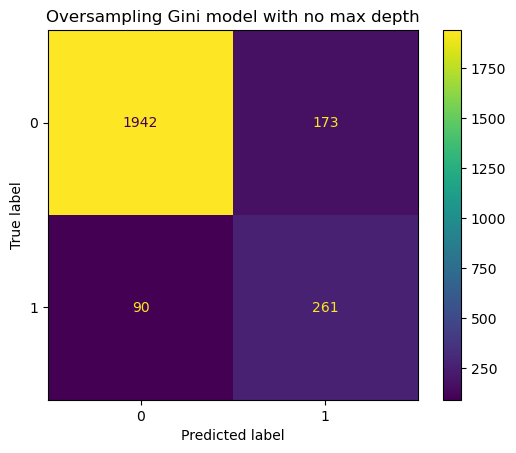

In [7]:
sm = SMOTE(random_state=42)
X_trainOS, y_trainOS = sm.fit_resample(X_train, y_train)

clf = RandomForestClassifier(criterion='gini', random_state=2)
clf.fit(X_trainOS, y_trainOS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Oversampling Gini model with no max depth')
plt.show()

0.9330996208064766


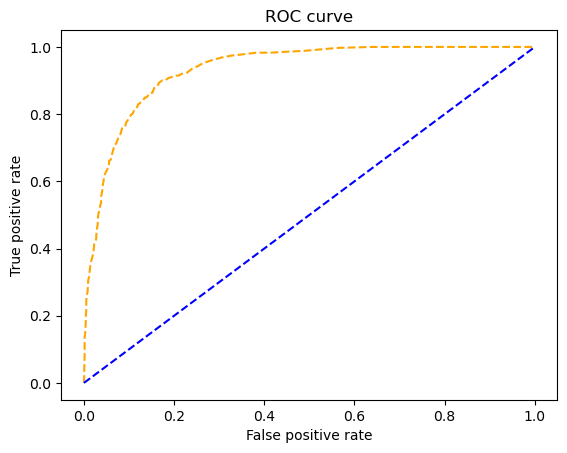

In [8]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

              precision    recall  f1-score   support

       False       0.97      0.88      0.92      2115
        True       0.54      0.81      0.65       351

    accuracy                           0.87      2466
   macro avg       0.75      0.85      0.79      2466
weighted avg       0.91      0.87      0.88      2466



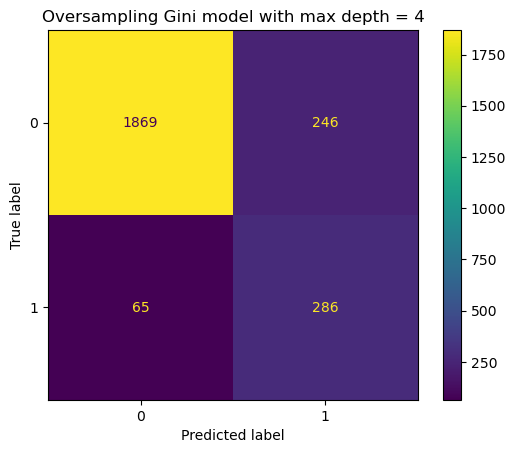

In [9]:
clf = RandomForestClassifier(criterion='gini', max_depth=4, random_state=2)
clf.fit(X_trainOS, y_trainOS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Oversampling Gini model with max depth = 4')
plt.show()

0.9089019552376525


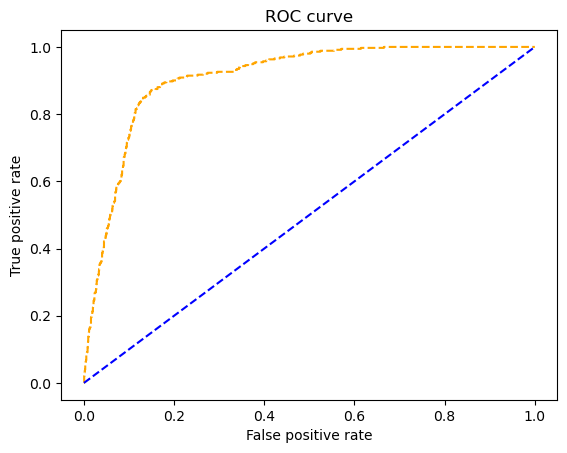

In [10]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

The Random Forest that wasn't given a max depth performed better in all aspects - precision, recall, f1, and the auc score were higher by several points. The entropy model shows similar results:

              precision    recall  f1-score   support

       False       0.96      0.91      0.94      2115
        True       0.60      0.76      0.67       351

    accuracy                           0.89      2466
   macro avg       0.78      0.84      0.80      2466
weighted avg       0.91      0.89      0.90      2466



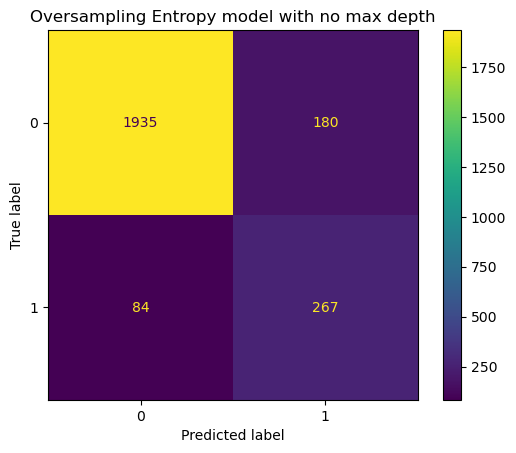

In [11]:
clf = RandomForestClassifier(criterion='entropy', random_state=2)
clf.fit(X_trainOS, y_trainOS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Oversampling Entropy model with no max depth')
plt.show()

0.9343193711988038


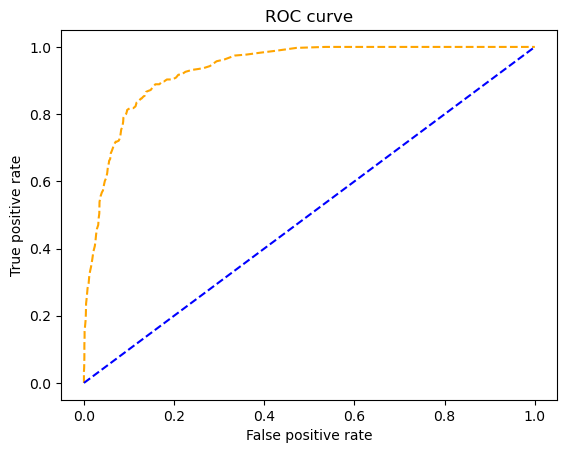

In [12]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

              precision    recall  f1-score   support

       False       0.97      0.88      0.92      2115
        True       0.54      0.81      0.65       351

    accuracy                           0.87      2466
   macro avg       0.75      0.85      0.79      2466
weighted avg       0.91      0.87      0.88      2466



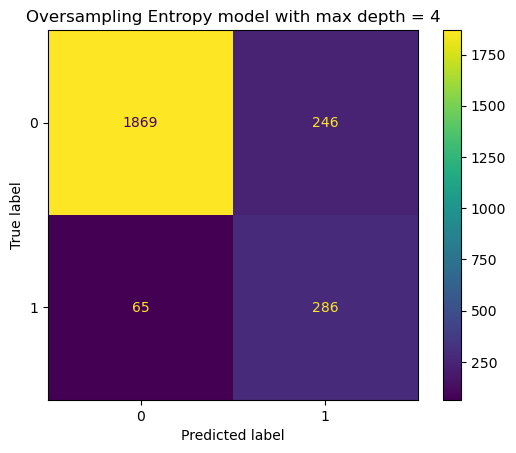

In [13]:
clf = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=2)
clf.fit(X_trainOS, y_trainOS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Oversampling Entropy model with max depth = 4')
plt.show()

0.9094326914657883


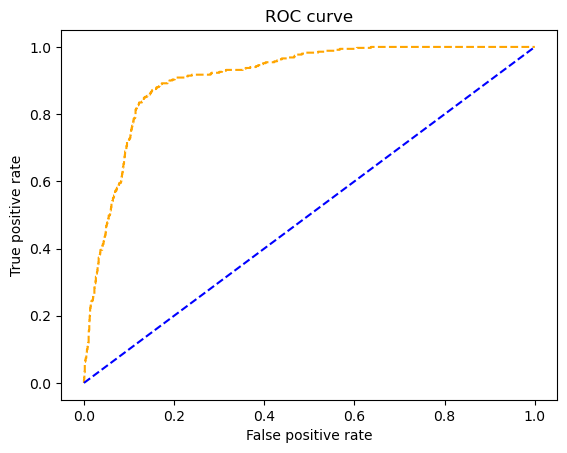

In [14]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Just so I don't limit myself to Random Forests, I also checked out Ada and Gradient boosting to see how those fared:

              precision    recall  f1-score   support

       False       0.95      0.92      0.94      2115
        True       0.61      0.73      0.66       351

    accuracy                           0.89      2466
   macro avg       0.78      0.82      0.80      2466
weighted avg       0.90      0.89      0.90      2466



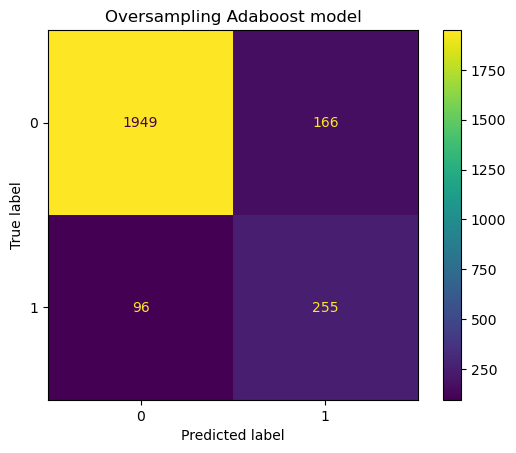

In [15]:
clf = AdaBoostClassifier(n_estimators=100, random_state=3)
clf.fit(X_trainOS, y_trainOS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Oversampling Adaboost model')
plt.show()

0.9142133586578032


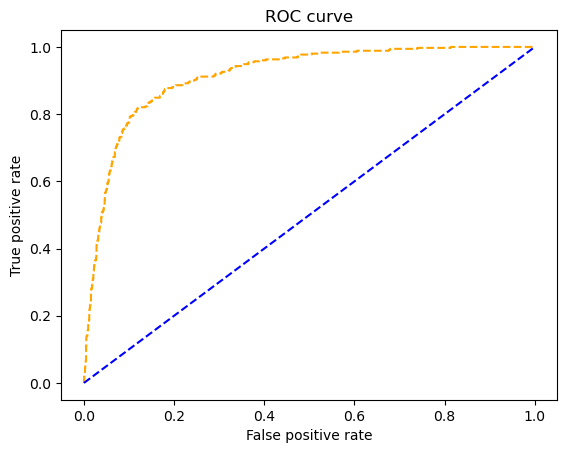

In [16]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

              precision    recall  f1-score   support

       False       0.96      0.92      0.94      2115
        True       0.60      0.76      0.67       351

    accuracy                           0.89      2466
   macro avg       0.78      0.84      0.80      2466
weighted avg       0.91      0.89      0.90      2466



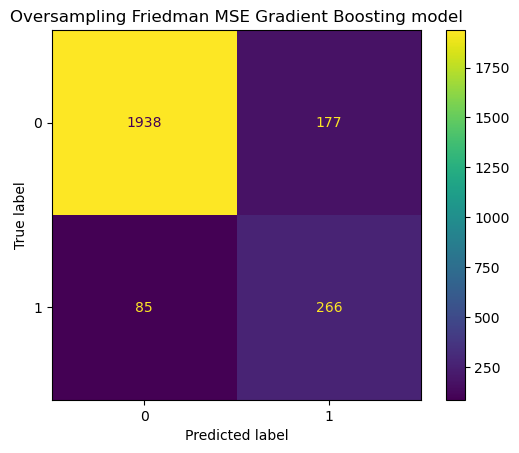

In [17]:
clf = GradientBoostingClassifier(n_estimators=100, criterion='friedman_mse', random_state=4)
clf.fit(X_trainOS, y_trainOS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Oversampling Friedman MSE Gradient Boosting model')
plt.show()

0.9308426447906354


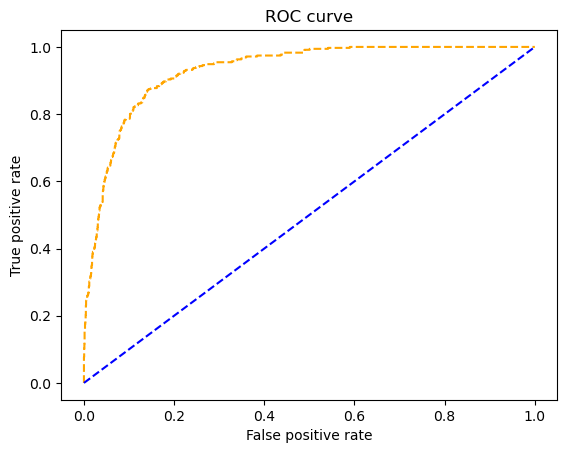

In [18]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Other than the gini and entropy models with a specified max depth, all of the models here scored very closely to each other which makes it hard to pick which one is truly "the best." Gradient boosting, unspecified entropy, and unspecified gini all had an auc score of about 93% and had high precision/recall/f1 scores so those would definitely be my first choices.

Now I'll see what happens when I undersample and use the same models:

              precision    recall  f1-score   support

       False       0.97      0.58      0.73      2115
        True       0.26      0.88      0.40       351

    accuracy                           0.63      2466
   macro avg       0.61      0.73      0.56      2466
weighted avg       0.87      0.63      0.68      2466



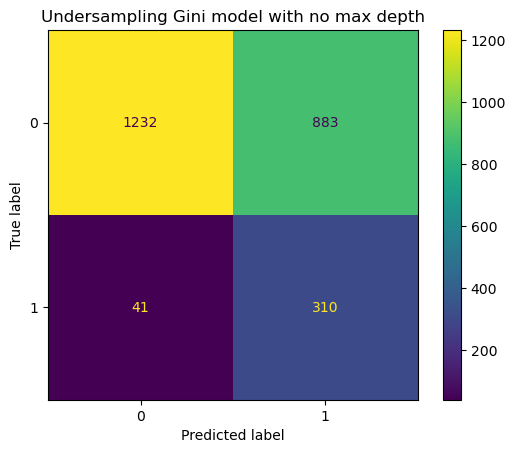

In [19]:
nm = NearMiss()
X_trainUS, y_trainUS = nm.fit_resample(X_train, y_train)
Counter(y_trainUS)


clf = RandomForestClassifier(criterion='gini', random_state=2)
clf.fit(X_trainUS, y_trainUS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Undersampling Gini model with no max depth')
plt.show()

0.8539626733480161


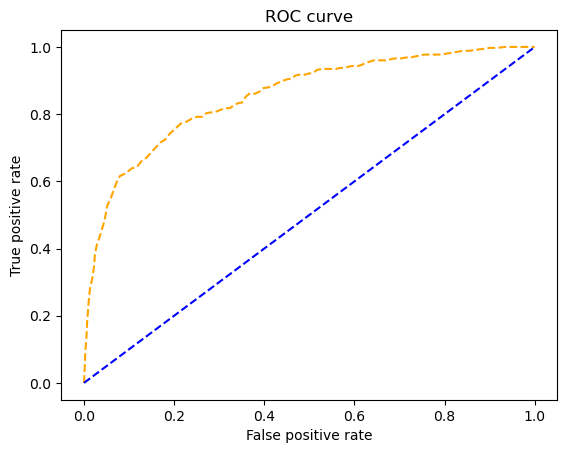

In [20]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

              precision    recall  f1-score   support

       False       0.97      0.78      0.86      2115
        True       0.39      0.86      0.54       351

    accuracy                           0.79      2466
   macro avg       0.68      0.82      0.70      2466
weighted avg       0.89      0.79      0.82      2466



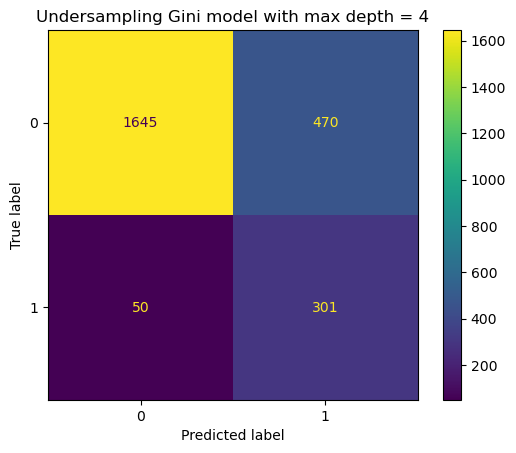

In [21]:
clf = RandomForestClassifier(criterion='gini', max_depth=4, random_state=2)
clf.fit(X_trainUS, y_trainUS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Undersampling Gini model with max depth = 4')
plt.show()

0.8727485805499989


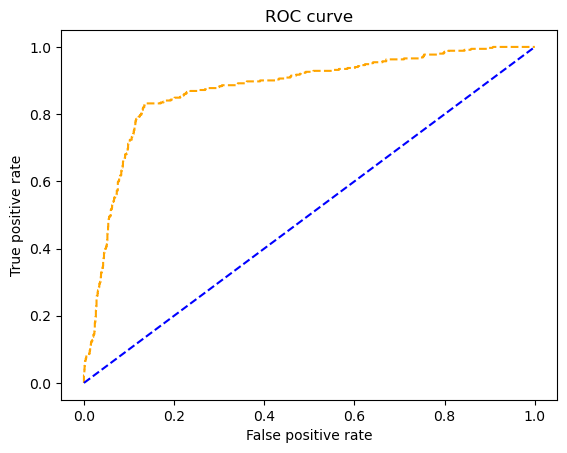

In [22]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

              precision    recall  f1-score   support

       False       0.97      0.63      0.76      2115
        True       0.29      0.89      0.43       351

    accuracy                           0.67      2466
   macro avg       0.63      0.76      0.60      2466
weighted avg       0.87      0.67      0.72      2466



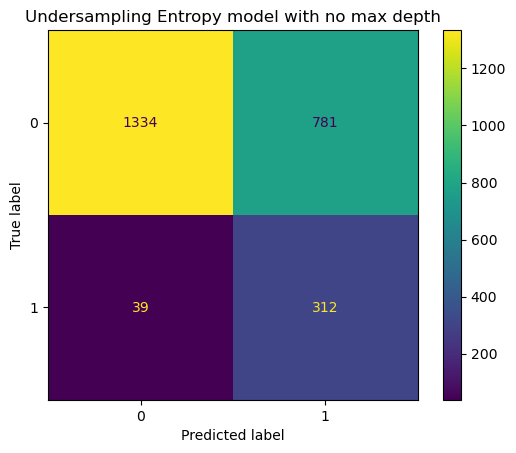

In [23]:
clf = RandomForestClassifier(criterion='entropy', random_state=2)
clf.fit(X_trainUS, y_trainUS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Undersampling Entropy model with no max depth')
plt.show()

0.8610824863779947


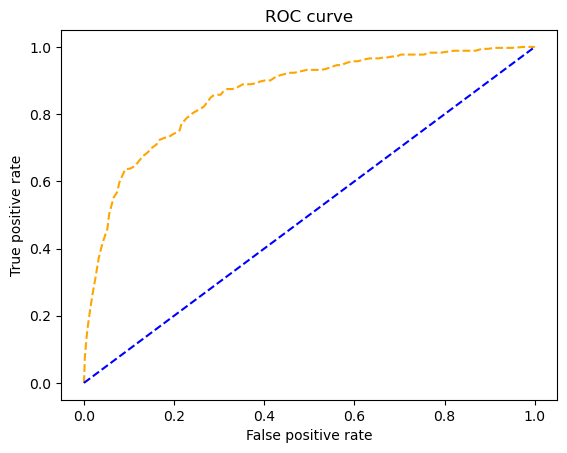

In [24]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

              precision    recall  f1-score   support

       False       0.97      0.80      0.87      2115
        True       0.41      0.85      0.55       351

    accuracy                           0.80      2466
   macro avg       0.69      0.83      0.71      2466
weighted avg       0.89      0.80      0.83      2466



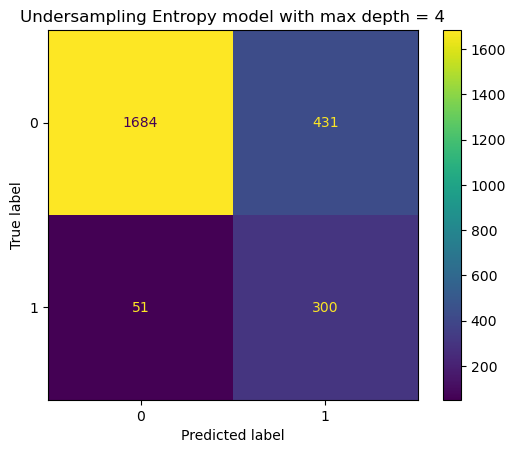

In [25]:
clf = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=2)
clf.fit(X_trainUS, y_trainUS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Undersampling Entropy model with max depth = 4')
plt.show()

0.8799067843985101


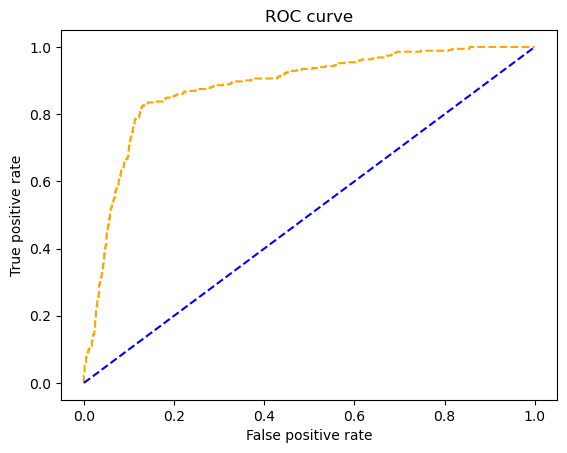

In [26]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

I knew that undersampling wouldn't have as great results but it is still shocking to see the difference in models. I was also surprised that specifying a max depth here did actually help the models perform better.

              precision    recall  f1-score   support

       False       0.96      0.50      0.66      2115
        True       0.23      0.88      0.36       351

    accuracy                           0.56      2466
   macro avg       0.59      0.69      0.51      2466
weighted avg       0.86      0.56      0.62      2466



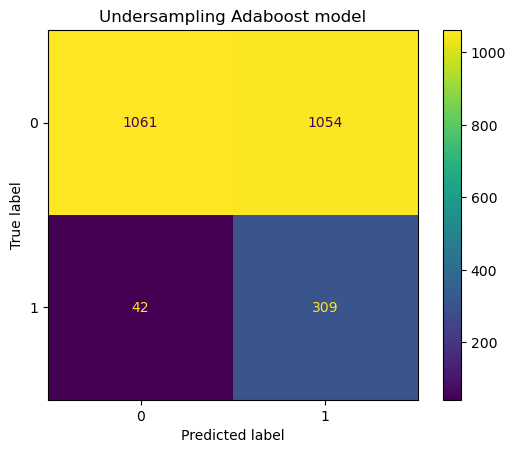

In [27]:
clf = AdaBoostClassifier(n_estimators=100, random_state=3)
clf.fit(X_trainUS, y_trainUS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Undersampling Adaboost model')
plt.show()

0.6856418338687842


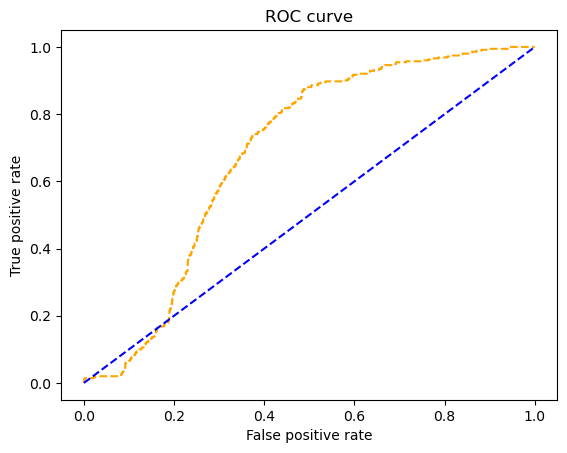

In [28]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

I think this is the most shocking to me - I didn't think Adaboosting would do this poorly, and it definitely stands out from the rest in terms of performance.

              precision    recall  f1-score   support

       False       0.97      0.60      0.74      2115
        True       0.27      0.89      0.41       351

    accuracy                           0.64      2466
   macro avg       0.62      0.74      0.58      2466
weighted avg       0.87      0.64      0.69      2466



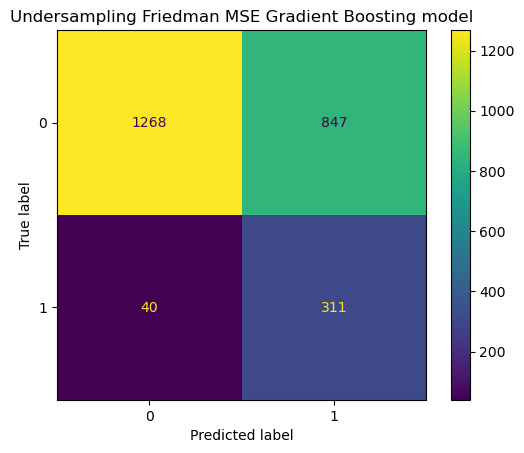

In [29]:
clf = GradientBoostingClassifier(n_estimators=100, criterion='friedman_mse', random_state=4)
clf.fit(X_trainUS, y_trainUS)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Undersampling Friedman MSE Gradient Boosting model')
plt.show()

0.8306075852175143


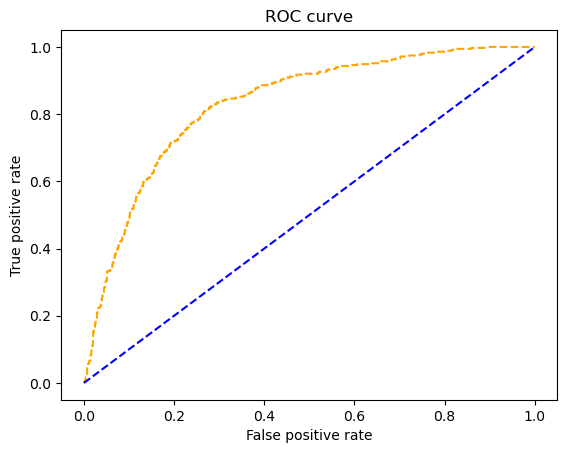

In [30]:
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)


plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Whereas with the oversampling all the models performed fairly well, there are clear differences when undersampling. I suppose in some ways it makes sense that the models that didn't do as well with oversampling did better when undersampling, but I am still shocked at what happened when using the Adaboost model. Having done this undersampling, I definitely would rule that out from what models to use just because it did so poorly.

Obviously these models shouldn't have nearly as much weight to them since none of them performed very well, but this does make me feel more confident in choosing an Entropy model with no specified max depth since it still performed decently when undersampling and was one of the top performing models when oversampling.

Finally, we move on to see what clusters emerge from the data using KMeans and PCA.

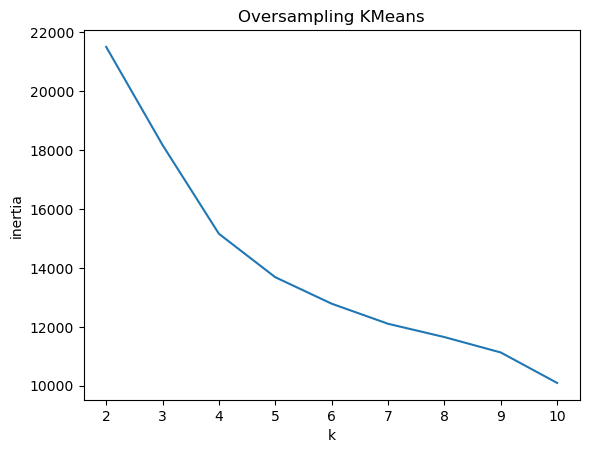

In [31]:
inertia = []
krange = range(2,11)
for k in krange:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=1)
    kmeans.fit(X_trainOS)
    inertia.append(kmeans.inertia_)
    
plt.plot(krange, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Oversampling KMeans')
plt.show()

It looks like when oversampling, k = 4 is the best, while when undersampling k = 6 is the best.

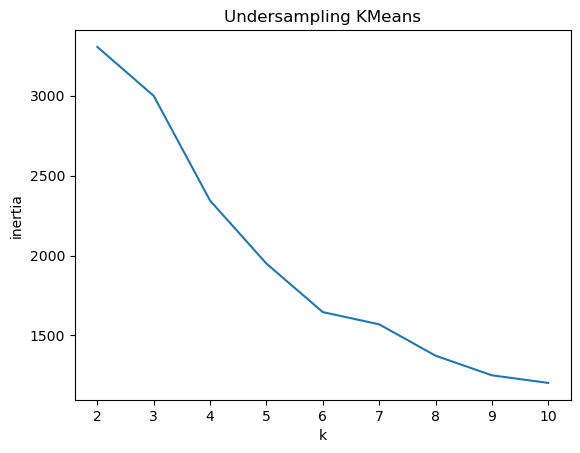

In [32]:
inertia = []
krange = range(2,11)
for k in krange:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=1)
    kmeans.fit(X_trainUS)
    inertia.append(kmeans.inertia_)
    
plt.plot(krange, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Undersampling KMeans')
plt.show()

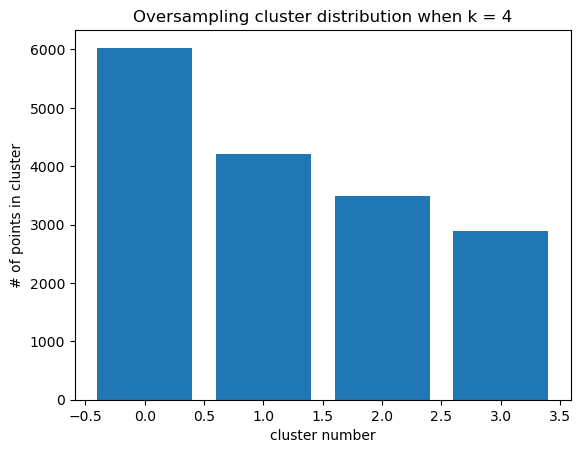

In [33]:
best_k = KMeans(n_clusters=4, n_init='auto', random_state=1).fit(X_trainOS)
X_trainOS_copy = X_trainOS.copy()
X_trainOS_copy['cluster'] = best_k.labels_
clusters = X_trainOS_copy['cluster'].value_counts()

plt.bar(range(0,4), height=clusters)
plt.xlabel('cluster number')
plt.ylabel('# of points in cluster')
plt.title('Oversampling cluster distribution when k = 4')
plt.show()

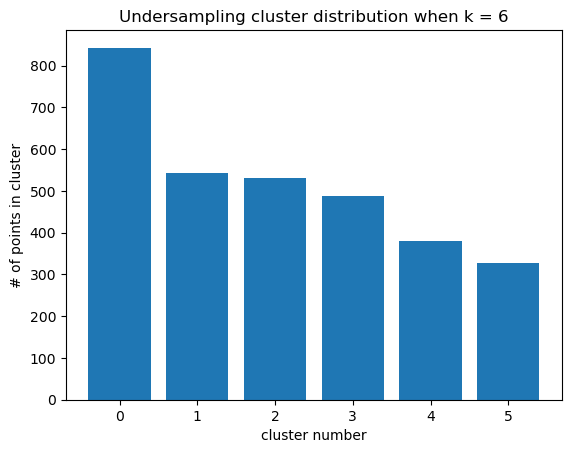

In [34]:
best_k = KMeans(n_clusters=6, n_init='auto', random_state=1).fit(X_trainUS)
X_trainUS_copy = X_trainUS.copy()
X_trainUS_copy['cluster'] = best_k.labels_
clusters = X_trainUS_copy['cluster'].value_counts()

plt.bar(range(0,6), height=clusters)
plt.xlabel('cluster number')
plt.ylabel('# of points in cluster')
plt.title('Undersampling cluster distribution when k = 6')
plt.show()

Visualizing the clusters:

Text(0.5, 1.0, 'Oversampled KMeans n_clusters = 4')

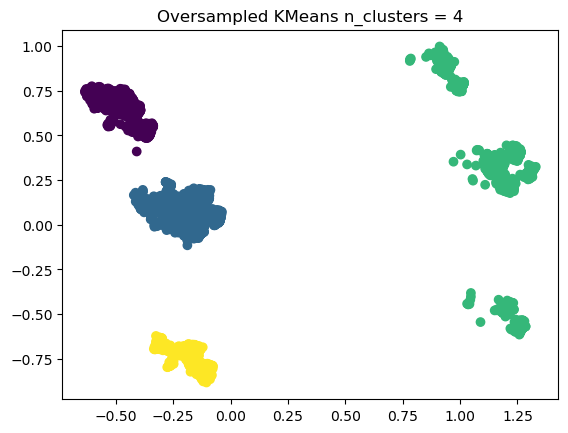

In [35]:
X_trainOS2 = X_trainOS[num_cols].copy()
kmean_mod = KMeans(n_clusters=4, n_init='auto', random_state=1).fit(X_trainOS)
X_trainOS2['cluster'] = kmean_mod.labels_
clusters = X_trainOS2['cluster'].value_counts()

pca = PCA(n_components=2)
pc1a, pc2a = zip(*pca.fit_transform(X_trainOS))

plt.scatter(pc1a, pc2a, c=X_trainOS2['cluster'])
plt.title('Oversampled KMeans n_clusters = 4')

Text(0.5, 1.0, 'Undersampled KMeans n_clusters = 6')

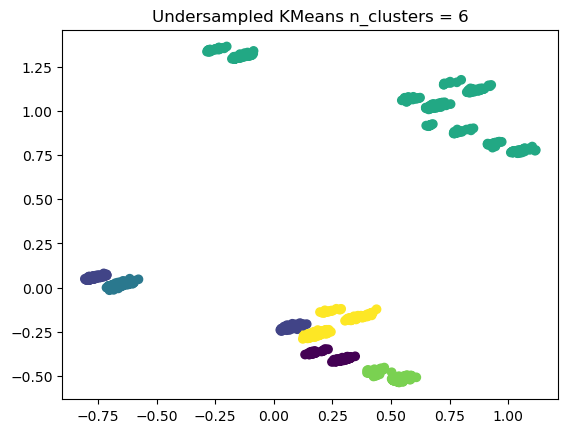

In [36]:
X_trainUS2 = X_trainUS[num_cols].copy()
kmean_mod = KMeans(n_clusters=6, n_init='auto', random_state=1).fit(X_trainUS)
X_trainUS2['cluster'] = kmean_mod.labels_
clusters = X_trainUS2['cluster'].value_counts()

pca = PCA(n_components=2)
pc1a, pc2a = zip(*pca.fit_transform(X_trainUS))

plt.scatter(pc1a, pc2a, c=X_trainUS2['cluster'])
plt.title('Undersampled KMeans n_clusters = 6')

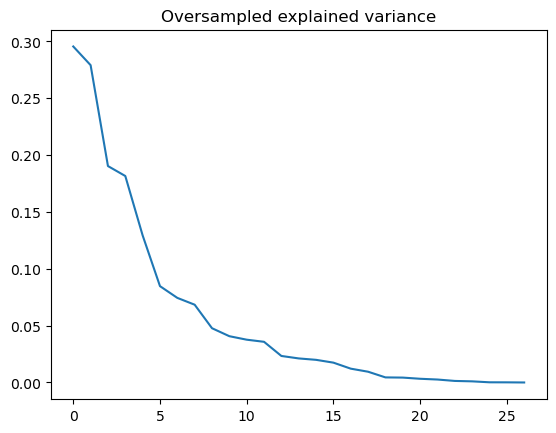

In [37]:
pca = PCA()
pca.fit(X_trainOS)
plt.plot(pca.explained_variance_)
plt.title('Oversampled explained variance')
plt.show()

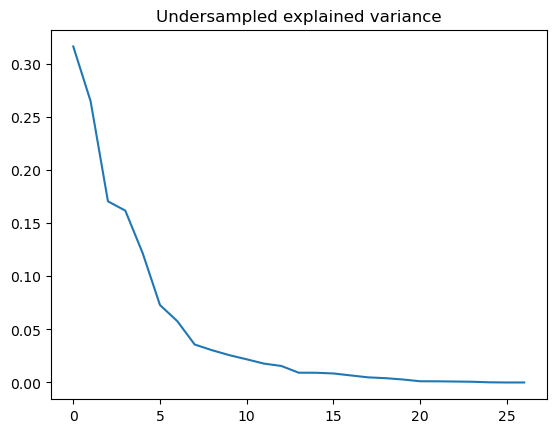

In [38]:
pca = PCA()
pca.fit(X_trainUS)
plt.plot(pca.explained_variance_)
plt.title('Undersampled explained variance')
plt.show()